## Comparing RF_right and RF_left during Squat

In [268]:
import kineticstoolkit as ktk
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

## Reading the c3d files

In [269]:
c3d_contents = ktk.read_c3d('Squat_2_0001.c3d', convert_point_unit=True)

## Extracting the EMG files from 'Analogs' TimeSeries

In [270]:
alg_info = c3d_contents["Analogs"]
emg_data = alg_info.data
rf_l = alg_info.get_subset(["EMG1_RectFem_L"])
rf_r = alg_info.get_subset(["EMG2_RectFem_R"])


## Filtering the EMG signal with bandpass filter with cut-off frequency 20 and 200 Hz

In [271]:
rfL_Filtered = ktk.filters.butter(rf_l, btype='bandpass', fc=[20, 200]) #The arguments are (signal_input, btype='bandpass', cut-off frequency)
rfR_Filtered = ktk.filters.butter(rf_r, btype='bandpass', fc=[20, 200])


## Rectifying the signal (eliminating the negative values)

In [272]:
rfL_Filtered.data["EMG1_RectFem_L"] = np.abs(rfL_Filtered.data["EMG1_RectFem_L"])
rfR_Filtered.data["EMG2_RectFem_R"] = np.abs(rfR_Filtered.data["EMG2_RectFem_R"])
# plt.plot(rfR_Filtered.data["EMG2_RectFem_R"],'b--')
# plt.plot(rfL_Filtered.data["EMG1_RectFem_L"], 'r-')

## Filter the signal again with low-pass filter with cut-off frequency of 20 Hz

In [273]:
rfL_Filtered = ktk.filters.butter(rfL_Filtered, fc=20)
rfR_Filtered = ktk.filters.butter(rfR_Filtered, fc=20)
rfL_Filtered = rfL_Filtered.rename_data("EMG1_RectFem_L", "Envelope")
rfR_Filtered = rfR_Filtered.rename_data("EMG2_RectFem_R", "Envelope")
rfL_comb = rf_l.merge(rfL_Filtered)
rfR_comb = rf_r.merge(rfR_Filtered)

## Trying Resample

In [274]:
rfL_comb.data["Resample"] = rfL_comb.resample(100.0)
rfR_comb.data["Resample"] = rfR_comb.resample(100.0)


## We compare the envelope signal between the right and left

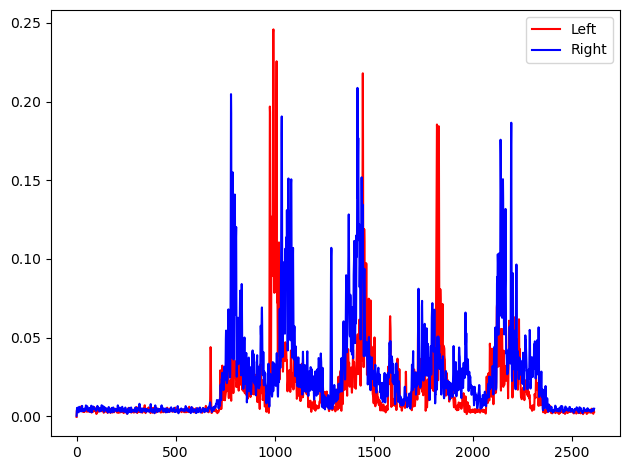

In [275]:
plt.plot(rfL_comb.data["Resample"].data["Envelope"], 'r-', label='Left')
plt.plot(rfR_comb.data["Resample"].data["Envelope"], 'b-', label='Right')
plt.legend()
plt.tight_layout()


## Using the CoM data to define repetition

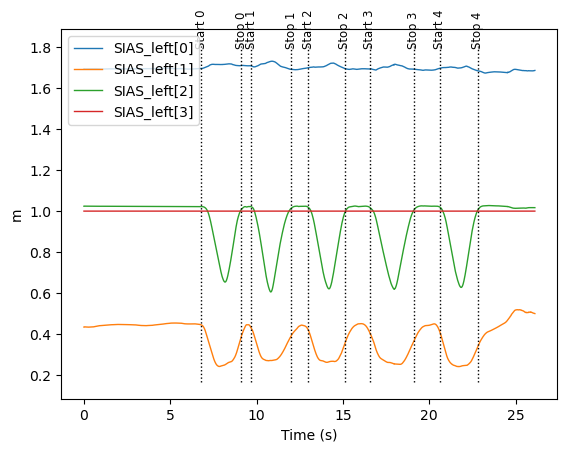

In [276]:
mrkr_info = c3d_contents["Points"]
mrkr_data = mrkr_info.data
r_asis = mrkr_info.get_subset(["SIAS_right"])
l_asis = mrkr_info.get_subset(["SIAS_left"])
# l_asis.data["SIAS_left"][:,2]
# plt.plot(l_asis.data["SIAS_left"][:,2])
l_asis = l_asis.add_event(6.80,"Start")
l_asis = l_asis.add_event(9.10,"Stop")
l_asis = l_asis.add_event(9.70,"Start")
l_asis = l_asis.add_event(12.0,"Stop")
l_asis = l_asis.add_event(13.0,"Start")
l_asis = l_asis.add_event(15.10,"Stop")
l_asis = l_asis.add_event(16.55,"Start")
l_asis = l_asis.add_event(19.10,"Stop")
l_asis = l_asis.add_event(20.60,"Start")
l_asis = l_asis.add_event(22.8,"Stop")
l_asis.plot()
# mrkr_info.time = mrkr_info.time/100
# mrkr_info.data["CoM"] = (r_asis.data["SIAS_right"] + l_asis.data["SIAS_left"])/2
# CoM = mrkr_info.data["CoM"]
# CoM = mrkr_info.get_subset(["CoM"])
# CoM.plot()
# Since there are many NaNs we for now we use only l_asis

## Indexing TimeSeries Events - Manually

In [277]:
# manually indexing start and stop of the exercise
n_starts = []
n_stops = []
starts = l_asis.count_events("Start")
stops = l_asis.count_events("Stop")

for start in range(starts):
    idx = l_asis.get_index_at_event("Start", occurrence=start)
    n_starts.append(l_asis.time[idx])

for stop in range(stops):
    idx = l_asis.get_index_at_event("Stop", occurrence=stop)
    n_stops.append(l_asis.time[idx])


## Cut the CoM data

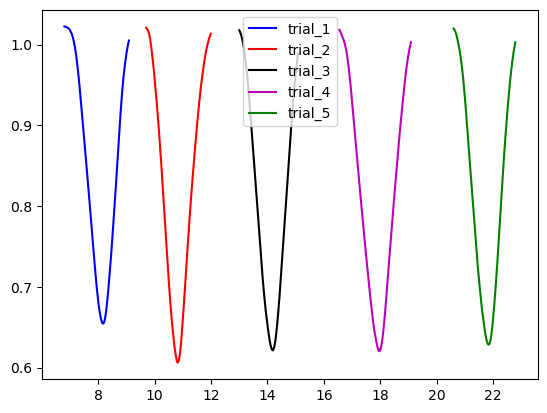

In [278]:
l_asis.trial_1 = l_asis.time[l_asis.get_index_at_time(n_starts[0]):l_asis.get_index_at_time(n_stops[0])]
l_asis.trial_2 = l_asis.time[l_asis.get_index_at_time(n_starts[1]):l_asis.get_index_at_time(n_stops[1])]
l_asis.trial_3 = l_asis.time[l_asis.get_index_at_time(n_starts[2]):l_asis.get_index_at_time(n_stops[2])]
l_asis.trial_4 = l_asis.time[l_asis.get_index_at_time(n_starts[3]):l_asis.get_index_at_time(n_stops[3])]
l_asis.trial_5 = l_asis.time[l_asis.get_index_at_time(n_starts[4]):l_asis.get_index_at_time(n_stops[4])]
plt.plot(l_asis.trial_1,mrkr_data["SIAS_left"][:,2][680:910], 'b-', label='trial_1')
plt.plot(l_asis.trial_2,mrkr_data["SIAS_left"][:,2][970:1200], 'r-', label='trial_2')
plt.plot(l_asis.trial_3,mrkr_data["SIAS_left"][:,2][1300:1510], 'k-', label='trial_3')
plt.plot(l_asis.trial_4,mrkr_data["SIAS_left"][:,2][1655:1910], 'm-', label='trial_4')
plt.plot(l_asis.trial_5,mrkr_data["SIAS_left"][:,2][2060:2280], 'g-', label='trial_5')
plt.legend()


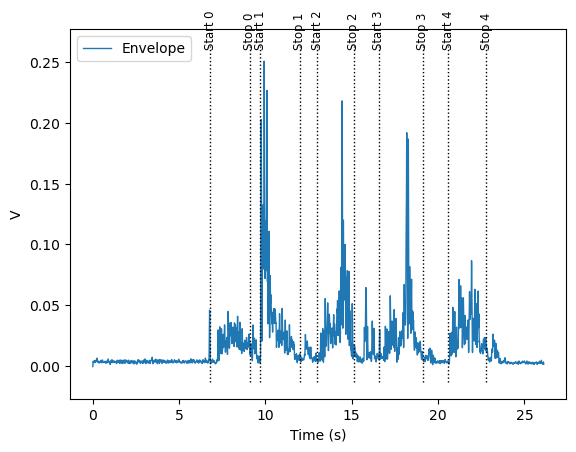

In [279]:
rfL_Filtered = rfL_Filtered.add_event(6.80,"Start")
rfL_Filtered = rfL_Filtered.add_event(9.10,"Stop")
rfL_Filtered = rfL_Filtered.add_event(9.70,"Start")
rfL_Filtered = rfL_Filtered.add_event(12.0,"Stop")
rfL_Filtered = rfL_Filtered.add_event(13.0,"Start")
rfL_Filtered = rfL_Filtered.add_event(15.10,"Stop")
rfL_Filtered = rfL_Filtered.add_event(16.55,"Start")
rfL_Filtered = rfL_Filtered.add_event(19.10,"Stop")
rfL_Filtered = rfL_Filtered.add_event(20.60,"Start")
rfL_Filtered = rfL_Filtered.add_event(22.8,"Stop")
rfL_Filtered.plot()

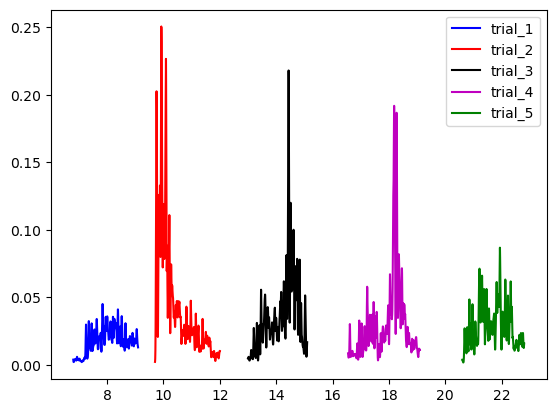

In [280]:
rf_l.trial_1 = rf_l.time[rf_l.get_index_at_time(n_starts[0]):rf_l.get_index_at_time(n_stops[0])]
rf_l.trial_2 = rf_l.time[rf_l.get_index_at_time(n_starts[1]):rf_l.get_index_at_time(n_stops[1])]
rf_l.trial_3 = rf_l.time[rf_l.get_index_at_time(n_starts[2]):rf_l.get_index_at_time(n_stops[2])]
rf_l.trial_4 = rf_l.time[rf_l.get_index_at_time(n_starts[3]):rf_l.get_index_at_time(n_stops[3])]
rf_l.trial_5 = rf_l.time[rf_l.get_index_at_time(n_starts[4]):rf_l.get_index_at_time(n_stops[4])]
plt.plot(rf_l.trial_1,rfL_Filtered.data["Envelope"][6800:9100], 'b-', label='trial_1')
plt.plot(rf_l.trial_2,rfL_Filtered.data["Envelope"][9700:12000], 'r-', label='trial_2')
plt.plot(rf_l.trial_3,rfL_Filtered.data["Envelope"][13000:15100], 'k-', label='trial_3')
plt.plot(rf_l.trial_4,rfL_Filtered.data["Envelope"][16550:19100], 'm-', label='trial_4')
plt.plot(rf_l.trial_5,rfL_Filtered.data["Envelope"][20600:22800], 'g-', label='trial_5')
plt.legend()

## Using automation to find each trial (repetition) instead of adding_events manually

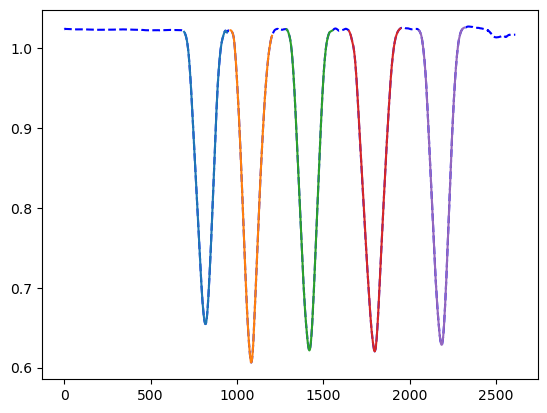

In [298]:
# We'll use scipy to find/recognise the trial, which will be represented as the peak (max/min). In this case, the peak will be the min
n_peaks,props = find_peaks(-mrkr_data["SIAS_left"][:,2], distance=200,prominence=-1,width=50)
plt.plot(mrkr_data["SIAS_left"][:,2],'b--')
# plt.plot(n_peaks, mrkr_data["SIAS_left"][:,2][n_peaks], 'ro')
bool_mask = mrkr_data["SIAS_left"][:,2][n_peaks] < 0.7
n_peaks = n_peaks[bool_mask]
width = props["widths"][bool_mask]
# offset = int((5 / 100) * len(mrkr_data["SIAS_left"][:,2]))
ranges = []

for idx,width in zip(n_peaks, width):
    offset = int((120 / 100)*width)
    start_idx = max(0, idx - offset)
    end_idx = min(len(mrkr_data["SIAS_left"][:, 2]) - 1, idx + offset + 1)
    ranges.append(range(start_idx, end_idx))

trial_1 = list(ranges[0])
trial_2 = list(ranges[1])
trial_3 = list(ranges[2])
trial_4 = list(ranges[3])
trial_5 = list(ranges[4])

plt.plot(trial_1, mrkr_data["SIAS_left"][:, 2][trial_1])
plt.plot(trial_2, mrkr_data["SIAS_left"][:, 2][trial_2])
plt.plot(trial_3, mrkr_data["SIAS_left"][:, 2][trial_3])
plt.plot(trial_4, mrkr_data["SIAS_left"][:, 2][trial_4])
plt.plot(trial_5, mrkr_data["SIAS_left"][:, 2][trial_5])